Challenge 3: Facial Expression Classification.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models


In [13]:
train_path = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/Challenge 3/data_train_Facial.npy'
test_path = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/Challenge 3/data_test_Facial.npy'
lables_path = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/Challenge 3/true_labels_Facial_train.csv'
train_data = np.load(train_path, allow_pickle = True)
test_data = np.load(test_path, allow_pickle = True)
labels = np.loadtxt(lables_path)
Emotions = ['Happy', 'Sad', 'Angry']


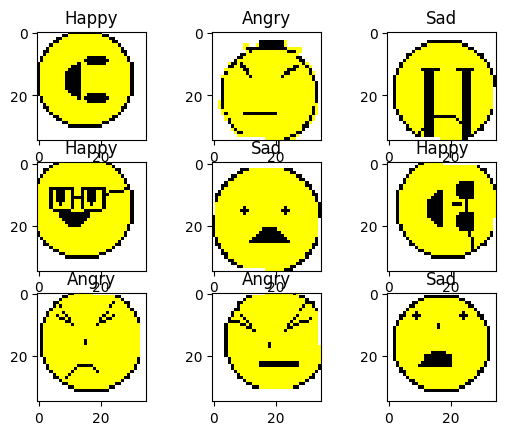

In [22]:
for k in range(9):
    plt.subplot(3,3,k+1 )
    plt.imshow(train_data[k, :, :], cmap = colors.ListedColormap(['white', 'yellow', 'black']))
    plt.title(Emotions[int(labels[k])])
       

In [38]:
# split the Data
# shuffle first
i = np.arange(train_data.shape[0])
np.random.shuffle(i)
train_data = train_data[i]
labels = labels[i]
# split
train_data_ = train_data[0:int(train_data.shape[0]*0.7)]
train_labels = labels[0:int(train_data.shape[0]*0.7)]
valid_data_ = train_data[int(int(train_data.shape[0]*0.7)):train_data.shape[0]]
valid_labels = labels[int(int(train_data.shape[0]*0.7)):train_data.shape[0]]

For this task we are going to use a Convolutional Neural Network.

## CNN

We define the convolutional base using a stack of Conv2D and MaxPooling2D.\
Our CNN takes as as an input a tensor of shape (35,35, 1).

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (35, 35, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))


In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 33, 33, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

Add the dense layers.

In [36]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(3))

The Architecture of the model.

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 33, 33, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1600)             

Compile and train the model.

In [39]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
history = model.fit(train_data_, train_labels, epochs = 10, 
                    validation_data = (valid_data_, valid_labels))
            

Epoch 1/10
438/438 [==============================] - 5s 10ms/step - loss: 0.3471 - accuracy: 0.8575 - val_loss: 0.1147 - val_accuracy: 0.9738
Epoch 2/10
438/438 [==============================] - 4s 10ms/step - loss: 0.0840 - accuracy: 0.9828 - val_loss: 0.0850 - val_accuracy: 0.9835
Epoch 3/10
438/438 [==============================] - 5s 10ms/step - loss: 0.0632 - accuracy: 0.9893 - val_loss: 0.0847 - val_accuracy: 0.9850
Epoch 4/10
438/438 [==============================] - 5s 10ms/step - loss: 0.0554 - accuracy: 0.9899 - val_loss: 0.0755 - val_accuracy: 0.9872
Epoch 5/10
438/438 [==============================] - 5s 11ms/step - loss: 0.0494 - accuracy: 0.9913 - val_loss: 0.0844 - val_accuracy: 0.9875
Epoch 6/10
438/438 [==============================] - 5s 11ms/step - loss: 0.0424 - accuracy: 0.9924 - val_loss: 0.0826 - val_accuracy: 0.9863
Epoch 7/10
438/438 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9928 - val_loss: 0.0801 - val_accuracy: 0.9865

Evaluation.

188/188 - 1s - loss: 0.1017 - accuracy: 0.9883 - 546ms/epoch - 3ms/step


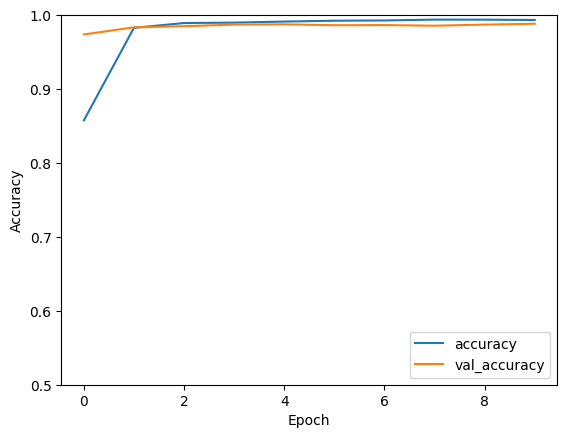

In [41]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(valid_data_,  valid_labels, verbose=2)

In [42]:
# Accuracy
test_acc

0.9883333444595337

Our model acheived an accuracy of 98%.

Now we are going to train our model on the hole training data and then predict.

In [44]:
# train the model.
model.fit(train_data, labels, epochs = 10)
prediction = model.predidct(test_data)

Epoch 1/10
625/625 [==============================] - 5s 9ms/step - loss: 0.0416 - accuracy: 0.9920
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0321 - accuracy: 0.9933
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0274 - accuracy: 0.9938
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0224 - accuracy: 0.9946
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0174 - accuracy: 0.9950
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0151 - accuracy: 0.9954
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 8/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 9/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 10/10
625/625 [==============================] - 2s 3ms/step


In [45]:
np.savetxt('prediction_facial_recognition_TheFisherMan.csv', prediction, delimiter=',')

Thank you. 😁